### Import Libraires

In [1]:
from bs4 import BeautifulSoup
import requests
import re
import matplotlib.pyplot as plt
import json
import datetime

%matplotlib inline

# Retrieve the HTML source code of Target page

In [2]:
# Download IMDB's Top 250 movies data
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

In [3]:
movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
ratings = [r.attrs.get('data-value') for r in soup.select('td.posterColumn span[name=ir]')]
votes = [r.attrs.get('data-value') for r in soup.select('td.posterColumn span[name=nv]')]      #td.ratingColumn strongb

## Extract all the JSON objects from their links

In [4]:
base_url = 'http://www.imdb.com'
details = []             # List containing all the JSON objects of 250 movies site

for i, mvi in enumerate(movies):
    if (i+1)%25 == 0:
        print("No. of Retrieved Movies: {}".format(i+1))
    
    mv_url = base_url + links[i]
    response = requests.get(mv_url)
    soup = BeautifulSoup(response.text, 'lxml')           # Parsed HTML code
    json_obj = json.loads(soup.select('script[type="application/ld+json"]')[0].contents[0])  # JSON Object
    details.append(json_obj)

print("Retrieved All Movies!!!")

No. of Retrieved Movies: 25
No. of Retrieved Movies: 50
No. of Retrieved Movies: 75
No. of Retrieved Movies: 100
No. of Retrieved Movies: 125
No. of Retrieved Movies: 150
No. of Retrieved Movies: 175
No. of Retrieved Movies: 200
No. of Retrieved Movies: 225
No. of Retrieved Movies: 250
Retrieved All Movies!!!


In [5]:
def genre_input(genre):
    if type(genre) is list:
        return ', '.join(genre)
    return genre

In [6]:
def content_rating(cntRt):
    if cntRt is None:
        return 'Not Rated'    # If in case the result is missing or None. Here there are 2 such instances.
    return cntRt

In [7]:
def director_input(dirc):
    if type(dirc) is list:
        return ', '.join([d['name'] for d in dirc])     # 23 movies have multiple co-director
    return dirc['name']

# Produce list of Dictionary containg movies details

In [8]:
imdb = []

# Store each item into dictionary (data), then put those into a list (imdb)
for i, dt in enumerate(details):

    movie_title = dt['name']
    directors = director_input(dt['director'])
    place = i+1
    try:
        contRate = dt['contentRating']
    except:
        contRate = 'Not Rated'
    genres = genre_input(dt['genre'])
    key_words = dt['keywords']
    release_date = dt['datePublished']
    data = {"movie_title": movie_title,
            "release_date": release_date,
            "place": place,
            "director": directors,
            "rating": ratings[i],
            "genre": genres,
            "key_words": key_words,
            "contRate": contRate,
            "vote": votes[i]}
    imdb.append(data)
    

# Using "csv" convert the lsit of dictionary into CSV files

In [9]:
import csv

headers = ['movie_title','release_date','place','contRate','director','rating','vote','key_words','genre']
    
with open('imdbTop250.csv', 'w', encoding='utf-8') as csvfile: 
    writer = csv.DictWriter(csvfile, fieldnames = headers) 
    writer.writeheader() 
    writer.writerows(imdb) 

In [10]:
import pandas as pd
import numpy as np

df = pd.read_csv('imdbTop250.csv')

In [11]:
df.head()

,movie_title,release_date,place,contRate,director,rating,vote,key_words,genre
0,The Shawshank Redemption,1994-09-23,1,R,Frank Darabont,9.222638,2274817,"wrongful imprisonment,based on the works of st...",Drama
1,The Godfather,1972-03-24,2,R,Francis Ford Coppola,9.148955,1569410,"crime family,mafia,patriarch,organized crime,r...","Crime, Drama"
2,The Godfather: Part II,1974-12-18,3,R,Francis Ford Coppola,8.981311,1096561,"revenge,corrupt politician,bloody body of chil...","Crime, Drama"
3,The Dark Knight,2008-07-16,4,PG-13,Christopher Nolan,8.972545,2236932,"dc comics,joker,psychopath,clown,criminal mast...","Action, Crime, Drama, Thriller"
4,12 Angry Men,1957-04-10,5,Approved,Sidney Lumet,8.929457,666957,"jury,dialogue driven,courtroom,single set prod...","Crime, Drama"


#### Function to compare date

In [12]:
def date(date):
    yy, mm, dd = [int(d) for d in date.split('-')]
    return datetime.date(yy, mm, dd)

In [13]:
yr = df.iloc[:,[1,5]]

In [14]:
yr = yr.sort_values('release_date')

In [15]:
yr.head()

,release_date,rating
100,1921-02-06,8.246774
200,1924-05-11,8.070973
153,1925-07-13,8.130248
197,1927-01-02,8.072254
112,1927-02-06,8.231792


In [16]:
y, r = np.array(yr.iloc[:,0]), np.array(yr.iloc[:,1])

In [17]:
yr_bar = {'1920s': 0,
          '1930s': 0,
          '1940s': 0,
          '1950s': 0,
          '1960s': 0,
          '1970s': 0,
          '1980s': 0,
          '1990s': 0,
          '2000s': 0,
          '2010s': 0,
          '2020s': 0}

In [18]:
for i,j in zip(y, r):
    if date(i) < datetime.date(1930,12,31): 
        yr_bar['1920s'] += 1
    elif date(i) < datetime.date(1940,1,1):
        yr_bar['1930s'] += 1
    elif date(i) < datetime.date(1950,1,1):
        yr_bar['1940s'] += 1
    elif date(i) < datetime.date(1960,1,1):
        yr_bar['1950s'] += 1
    elif date(i) < datetime.date(1970,1,1):
        yr_bar['1960s'] += 1
    elif date(i) < datetime.date(1980,1,1):
        yr_bar['1970s'] += 1
    elif date(i) < datetime.date(1990,1,1):
        yr_bar['1980s'] += 1
    elif date(i) < datetime.date(2000,1,1):
        yr_bar['1990s'] += 1
    elif date(i) < datetime.date(2010,1,1):
        yr_bar['2000s'] += 1
    elif date(i) < datetime.date(2020,1,1):
        yr_bar['2010s'] += 1
    else :
        yr_bar['2020s'] += 1

## The Distribution of movies in Top 250 in Decads b/w 1920 - 2020

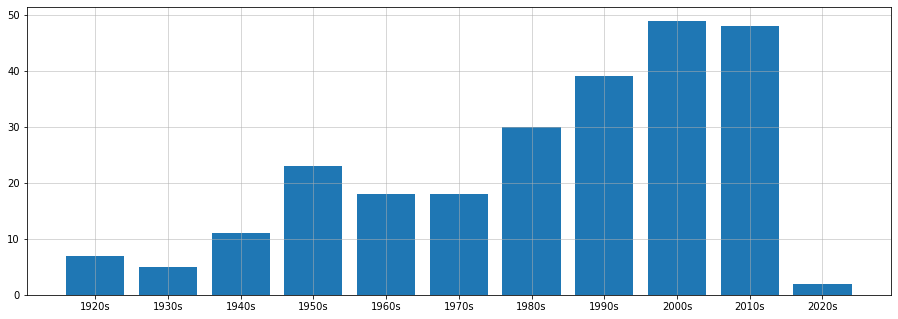

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
decads = yr_bar.keys()
movies = yr_bar.values()
ax.bar(decads,movies)
ax.grid(lw = '0.5')
plt.show()

In [20]:
dirc = df.iloc[:,4]

dirc.head()

0          Frank Darabont
1    Francis Ford Coppola
2    Francis Ford Coppola
3       Christopher Nolan
4            Sidney Lumet
Name: director, dtype: object

In [21]:
dirc = ', '.join(dirc)

dirc = dirc.split(', ')     # Form a single list of directors

In [22]:
director_data = {}

for d in dirc:
    try:
        director_data[d] += 1
    except:
        director_data[d] = 1

In [23]:
labels = []
vals = []

for i,(j,k) in enumerate(sorted(director_data.items(), key= lambda item: item[1] , reverse=True)):
    if i > 10:
        break
    labels.append(j)
    vals.append(k)

## The Top 10 Directors with highest No. of Movies in Top 250

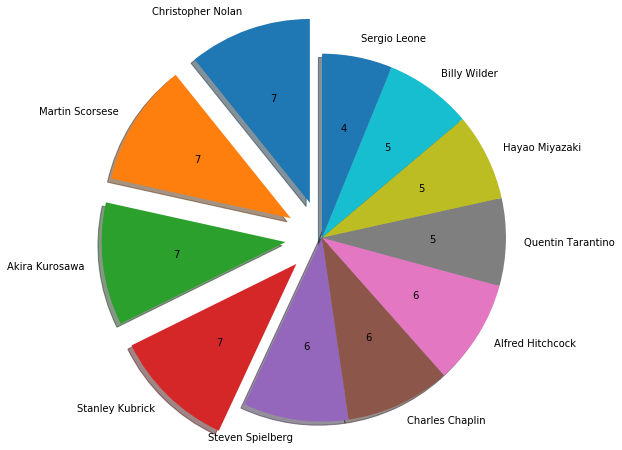

In [24]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:d}".format(absolute)

explode = (0.2, 0.2, 0.2, 0.2, 0, 0, 0, 0, 0,0,0)  # only "explode" the Top slices

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(vals, labels=labels, explode=explode, autopct=lambda pct: func(pct, vals),
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [25]:
gen = df.iloc[:,8]

gen.head()

0                             Drama
1                      Crime, Drama
2                      Crime, Drama
3    Action, Crime, Drama, Thriller
4                      Crime, Drama
Name: genre, dtype: object

In [26]:
gen = ', '.join(gen)

gen = gen.split(', ')     # Form a single list of all genres

In [27]:
genre_data = {}

for g in gen:
    try:
        genre_data[g] += 1
    except:
        genre_data[g] = 1

In [28]:
labels = []
vals = []

for i,(j,k) in enumerate(sorted(genre_data.items(), key= lambda item: item[1] , reverse=True)):
    if i > 10:
        break
    labels.append(j)
    vals.append(k)

## The Distribution of Genres in Top 250 movies

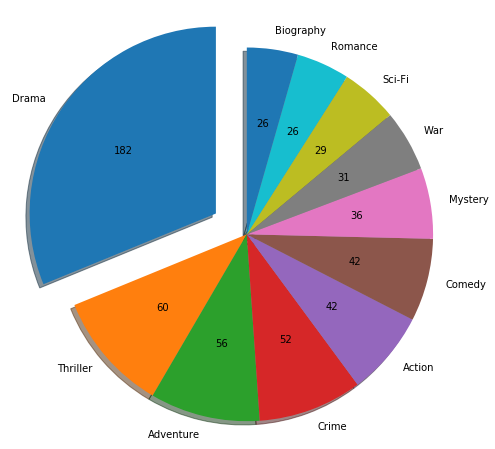

In [29]:
explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0,0,0)  # only "explode" the Top slice

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(vals, labels=labels, explode=explode, autopct=lambda pct: func(pct, vals),
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()